## Phenotypic phase plane analysis

We are going to analyse the cell factory response to changes in the Glucose and oxygen concentration, basing it in the biomass and ethylene production.

In [ ]:
%run iJO1366_V0.ipynb

from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [2]:
#Renaming some of the reactions to use
glc_ex = model.reactions.EX_glc__D_e
o2_ex = model.reactions.EX_o2_e
growth = model.reactions.BIOMASS_Ec_iJO1366_WT_53p95M

In [3]:
YEPDmedium = model.medium
#We define the Glc intake at 40 (as describe in the media optimization)
YEPDmedium['EX_glc__D_e'] = 40
model.reactions.EX_glc__D_e.bounds = -40, 0 #upper bound '0', the model can't produce Glc, only consume it until the limit set by the lower bound

In [4]:
ppp_biomass = production_envelope(model,
                    reactions=[glc_ex],
                    objective=growth)
ppp_biomass

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,3.985418,9.637380e+00,NaN,-40.000000
1,EX_glc__D_e,0.0,0.0,NaN,3.775674,9.635623e+00,NaN,-37.901792
2,EX_glc__D_e,0.0,0.0,NaN,3.565930,9.633661e+00,NaN,-35.803583
3,EX_glc__D_e,0.0,0.0,NaN,3.356186,9.631454e+00,NaN,-33.705375
4,EX_glc__D_e,0.0,0.0,NaN,3.146442,9.628955e+00,NaN,-31.607167
5,EX_glc__D_e,0.0,0.0,NaN,2.936698,9.626100e+00,NaN,-29.508959
6,EX_glc__D_e,0.0,0.0,NaN,2.726953,9.622808e+00,NaN,-27.410750
7,EX_glc__D_e,0.0,0.0,NaN,2.517209,9.618970e+00,NaN,-25.312542
8,EX_glc__D_e,0.0,0.0,NaN,2.307465,9.614439e+00,NaN,-23.214334
9,EX_glc__D_e,0.0,0.0,NaN,2.097721,9.609007e+00,NaN,-21.116125


<AxesSubplot:xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

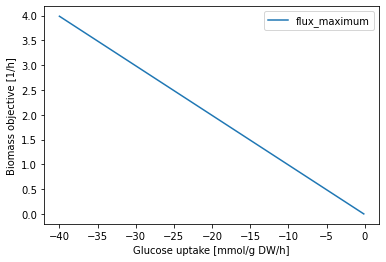

In [6]:
ppp_biomass.plot(x='EX_glc__D_e', y='flux_maximum', xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]')

In [11]:
#Now we are going to calculate the impact in the biomass production depending on the oxygen level
medium_oxy_ex = model.medium["EX_o2_e"]
medium = model.medium
with model: #modification are done locally within the indent
    growth_rate = model.optimize().objective_value
    print("At oxygen concentration = {}:".format(medium["EX_o2_e"]), "Maximum theoretical growth rate =", growth_rate, "h^-1")
    
    medium["EX_o2_e"] = 300 #oxygen level is changed 
    model.medium = medium
    
    growth_rate = model.optimize().objective_value
    print("At oxygen concentration = {}:".format(medium["EX_o2_e"]), "Maximum theoretical growth rate =", growth_rate, "h^-1")  
    
    medium["EX_o2_e"] = 50 #oxygen level is changed 
    model.medium = medium
    
    growth_rate = model.optimize().objective_value
    print("At oxygen concentration = {}:".format(medium["EX_o2_e"]), "Maximum theoretical growth rate =", growth_rate, "h^-1")
    
    medium["EX_o2_e"] = 20 #oxygen level is changed 
    model.medium = medium
    
    growth_rate = model.optimize().objective_value
    print("At oxygen concentration = {}:".format(medium["EX_o2_e"]), "Maximum theoretical growth rate =", growth_rate, "h^-1")

At oxygen concentration = 1000.0: Maximum theoretical growth rate = 3.9686825797077536 h^-1
At oxygen concentration = 300: Maximum theoretical growth rate = 3.9686825797247414 h^-1
At oxygen concentration = 50: Maximum theoretical growth rate = 3.3680946723920377 h^-1
At oxygen concentration = 20: Maximum theoretical growth rate = 2.070917945919829 h^-1


In [7]:
ppp_o2 = production_envelope(model,
                            reactions=[o2_ex],
                            objective=growth)
ppp_o2

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.000000,1.473870e-13,NaN,-490.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.600690,1.452566e+00,NaN,-464.210526
2,EX_glc__D_e,0.0,0.0,NaN,1.201381,2.905131e+00,NaN,-438.421053
3,EX_glc__D_e,0.0,0.0,NaN,1.802071,4.357697e+00,NaN,-412.631579
4,EX_glc__D_e,0.0,0.0,NaN,2.402762,5.810263e+00,NaN,-386.842105
5,EX_glc__D_e,0.0,0.0,NaN,3.003452,7.262829e+00,NaN,-361.052632
6,EX_glc__D_e,0.0,0.0,NaN,3.604143,8.715394e+00,NaN,-335.263158
7,EX_glc__D_e,0.0,0.0,NaN,3.985418,9.637380e+00,NaN,-309.473684
8,EX_glc__D_e,0.0,0.0,NaN,3.985418,9.637380e+00,NaN,-283.684211
9,EX_glc__D_e,0.0,0.0,NaN,3.985418,9.637380e+00,NaN,-257.894737


<AxesSubplot:xlabel='Oxygen uptake rate [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

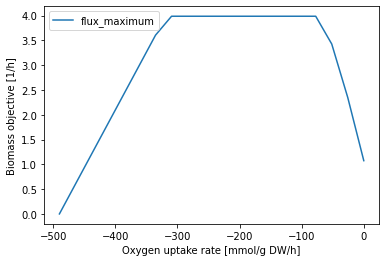

In [10]:
ppp_o2.plot(x='EX_o2_e', y='flux_maximum', xlabel='Oxygen uptake rate [mmol/g DW/h]', ylabel='Biomass objective [1/h]')

As we can see in the previous analysis and in this graphic, our *E. coli* strain is subjected to oxygen stress.

In [9]:
ppp_eth = production_envelope(model,
                    reactions=[glc_ex],
                    objective=model.reactions.EFE_m)
ppp_eth

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,51.456071,1.072001e+00,NaN,-40.000000
1,EX_glc__D_e,0.0,0.0,NaN,48.751096,1.071873e+00,NaN,-37.901792
2,EX_glc__D_e,0.0,0.0,NaN,46.046121,1.071730e+00,NaN,-35.803583
3,EX_glc__D_e,0.0,0.0,NaN,43.341146,1.071569e+00,NaN,-33.705375
4,EX_glc__D_e,0.0,0.0,NaN,40.636171,1.071386e+00,NaN,-31.607167
5,EX_glc__D_e,0.0,0.0,NaN,37.931196,1.071177e+00,NaN,-29.508959
6,EX_glc__D_e,0.0,0.0,NaN,35.226221,1.070937e+00,NaN,-27.410750
7,EX_glc__D_e,0.0,0.0,NaN,32.521246,1.070657e+00,NaN,-25.312542
8,EX_glc__D_e,0.0,0.0,NaN,29.816271,1.070325e+00,NaN,-23.214334
9,EX_glc__D_e,0.0,0.0,NaN,27.111296,1.069929e+00,NaN,-21.116125


<AxesSubplot:xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Ethylene objective [mmol/g DW/h]'>

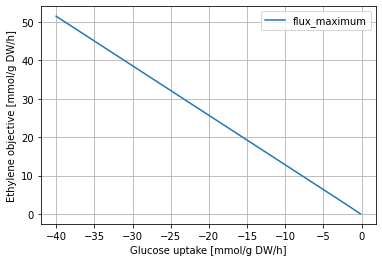

In [13]:
ppp_eth.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", 
                         ylabel="Ethylene objective [mmol/g DW/h]", grid=True)

In [14]:
ppp_eth_o2 = production_envelope(model,
                    reactions=[o2_ex],
                    objective=model.reactions.EFE_m)
ppp_eth_o2

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.000000,1.739776e-14,NaN,-490.000000
1,EX_glc__D_e,0.0,0.0,NaN,7.368421,1.535088e-01,NaN,-464.210526
2,EX_glc__D_e,0.0,0.0,NaN,14.736842,3.070175e-01,NaN,-438.421053
3,EX_glc__D_e,0.0,0.0,NaN,22.105263,4.605263e-01,NaN,-412.631579
4,EX_glc__D_e,0.0,0.0,NaN,29.473684,6.140351e-01,NaN,-386.842105
5,EX_glc__D_e,0.0,0.0,NaN,36.842105,7.675439e-01,NaN,-361.052632
6,EX_glc__D_e,0.0,0.0,NaN,44.210526,9.210526e-01,NaN,-335.263158
7,EX_glc__D_e,0.0,0.0,NaN,51.456071,1.072001e+00,NaN,-309.473684
8,EX_glc__D_e,0.0,0.0,NaN,51.456071,1.072001e+00,NaN,-283.684211
9,EX_glc__D_e,0.0,0.0,NaN,51.456071,1.072001e+00,NaN,-257.894737


<AxesSubplot:xlabel='Oxygen uptake rate [mmol/g DW/h]', ylabel='Ethylene [mmol/g DW/h]'>

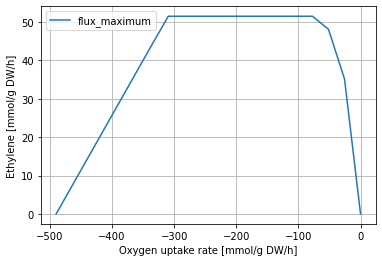

In [15]:
ppp_eth_o2.plot(x='EX_o2_e', y='flux_maximum', xlabel="Oxygen uptake rate [mmol/g DW/h]", 
                    ylabel="Ethylene [mmol/g DW/h]", grid=True)

As expected for our cell factory, the Glc concentration and oxygen levels are key for the biomass and ethylene production.